In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
df = "../data/rawdata/winemag-data-130K-v2.csv"
df_one = pd.read_csv(df,index_col=0)
df_2 = df_one.dropna(subset=['points', 'price', 'country'])
df_2.shape

(120916, 13)

In [3]:
df_2.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem


In [4]:
df_2.describe()

,points,price
count,120916.000000,120916.000000
mean,88.421723,35.368644
std,3.044942,41.031052
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


In [5]:
bins_rating= [80,85,90,95,100]
wine_rating = ["80-84", "85 to 89", "90 to 94", "100"]


In [6]:
df_2["Rating"]= pd.cut(df_2["points"], bins_rating, labels= wine_rating, right=False)
df_2.head()

C:\Users\mwhaw\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,Rating
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,85 to 89
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,85 to 89
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,85 to 89
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,85 to 89
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,85 to 89


In [7]:
#Sparkling Wine
#Light-Bodied White Wine
#Full-Bodied White Wine
#Aromatic (sweet) White Wine
#Rosé Wine
#Light-Bodied Red Wine
#Medium-Bodied Red Wine
#Full-Bodied Red Wine
#Dessert Wine


#if statement- top 30 catgories of wine. 



In [47]:
#determine which variety has the highest points
df_taster_points = df_2.groupby(["taster_name"]).mean()
df_taster_points = df_taster_points.reset_index()
df_taster_points.head()


,taster_name,points,price
0,Alexander Peartree,85.854722,29.053269
1,Anna Lee C. Iijima,88.405127,29.790112
2,Anne Krebiehl MW,90.612570,31.244910
3,Carrie Dykes,86.384058,30.753623
4,Christina Pickard,87.833333,29.333333


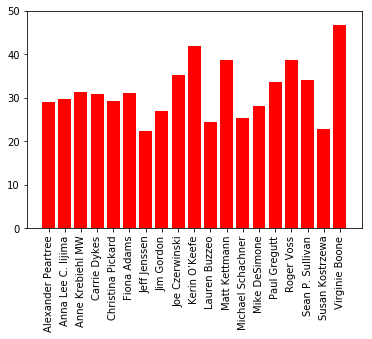

In [62]:
plt.bar(df_taster_points["taster_name"], df_taster_points["price"], color='r')
plt.ylim([0, 50])
plt.xticks(rotation=90)
plt.show()

In [79]:
df_variety = df_2.groupby(["country"]).mean()
df_variety = df_variety.reset_index()
df_variety.head()


,country,points,price
0,Argentina,86.710330,24.510117
1,Armenia,87.500000,14.500000
2,Australia,88.595466,35.437663
3,Austria,90.190782,30.762772
4,Bosnia and Herzegovina,86.500000,12.500000


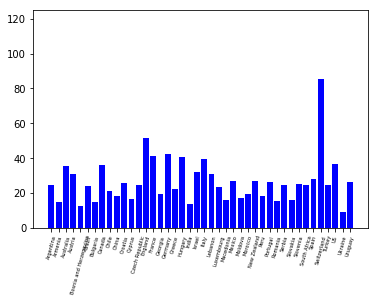

In [87]:
plt.bar(df_variety["country"], df_variety["price"], color='b')
plt.ylim([0, 125])
plt.xticks(rotation=75, fontsize=5)
plt.show()